<ipython-input-10-8292c938b4eb>:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


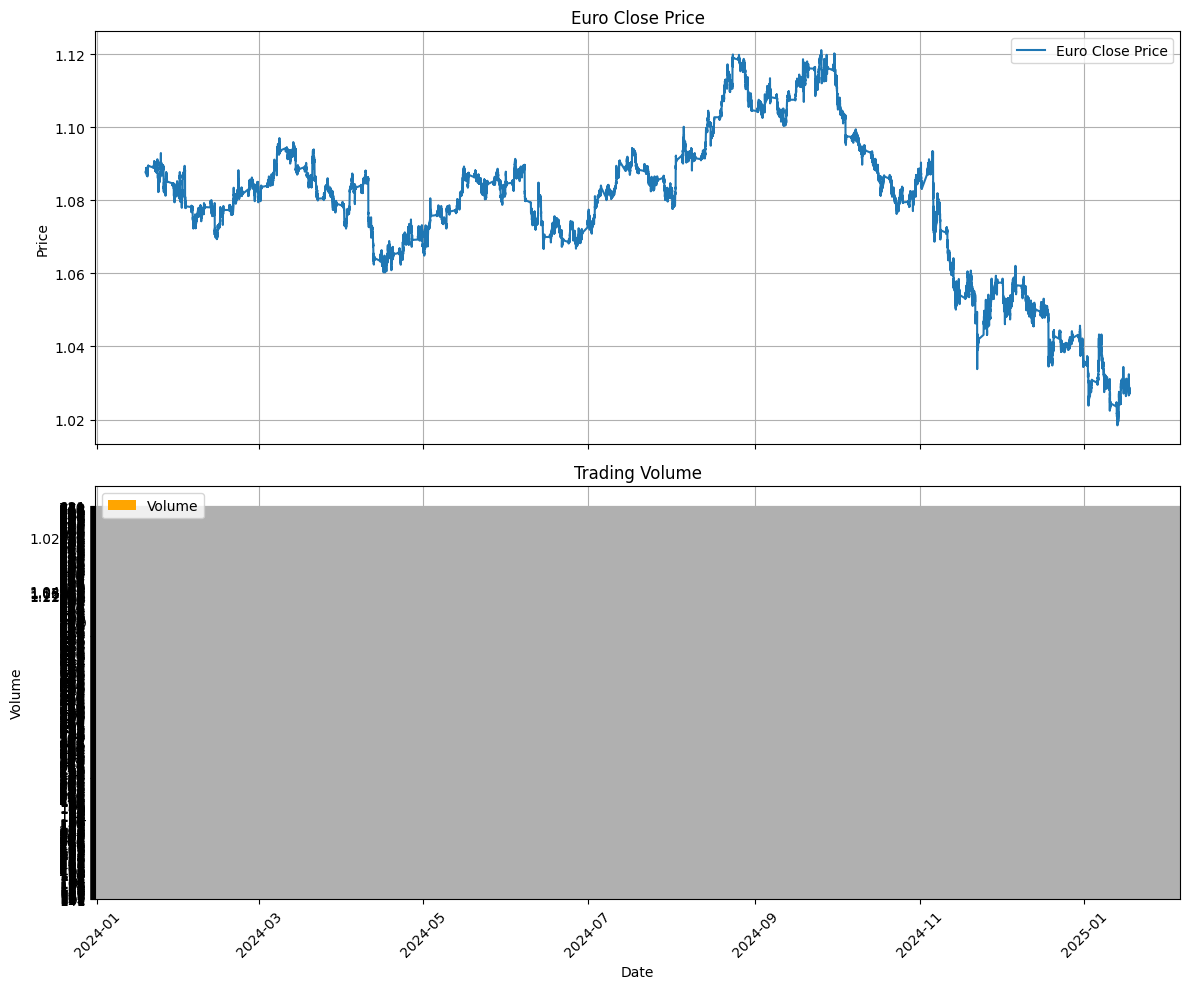

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('EUROUSDRAW.csv')
except FileNotFoundError:
    print("Error: 'EUROUSDRAW.csv' not found. Please upload the file.")
    exit()

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')

# Flip the DataFrame so that the oldest data appears first
df = df.iloc[::-1].reset_index(drop=True)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot the 'Close' price on the first subplot
ax1.plot(df['Date'], df['Close'], label='Euro Close Price')
ax1.set_ylabel('Price')
ax1.set_title('Euro Close Price')
ax1.legend()
ax1.grid(True)

# Plot the Volume on the second subplot
ax2.bar(df['Date'], df['Volume'], label='Volume', color='orange')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.set_title('Trading Volume')
ax2.legend()
ax2.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


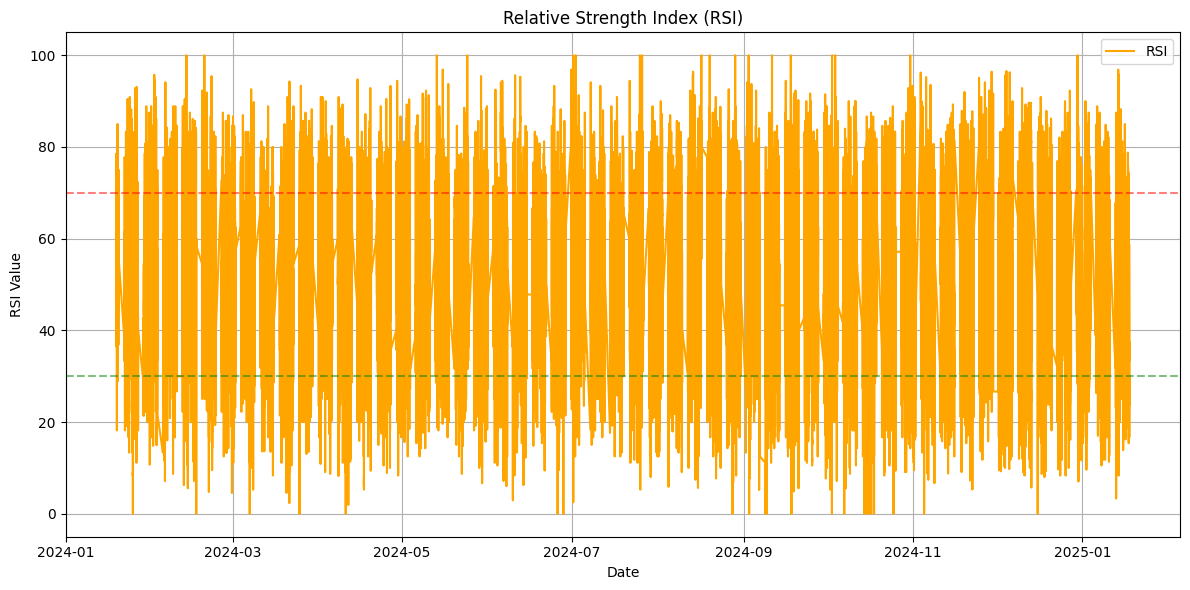

In [ ]:
# Calculate the RSI (Relative Strength Index) with a 14-interval period
def calculate_rsi(data, interval=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=interval).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=interval).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)

# Plot the RSI
fig, ax2 = plt.subplots(figsize=(12, 6))

# Plot the RSI on a single subplot
ax2.plot(df['Date'], df['RSI'], label='RSI', color='orange')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI Value')
ax2.set_title('Relative Strength Index (RSI)')
ax2.legend()
ax2.grid(True)

# Add horizontal lines for overbought (70) and oversold (30) levels on RSI plot
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.5)
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


<ipython-input-7-46018a2aaa61>:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


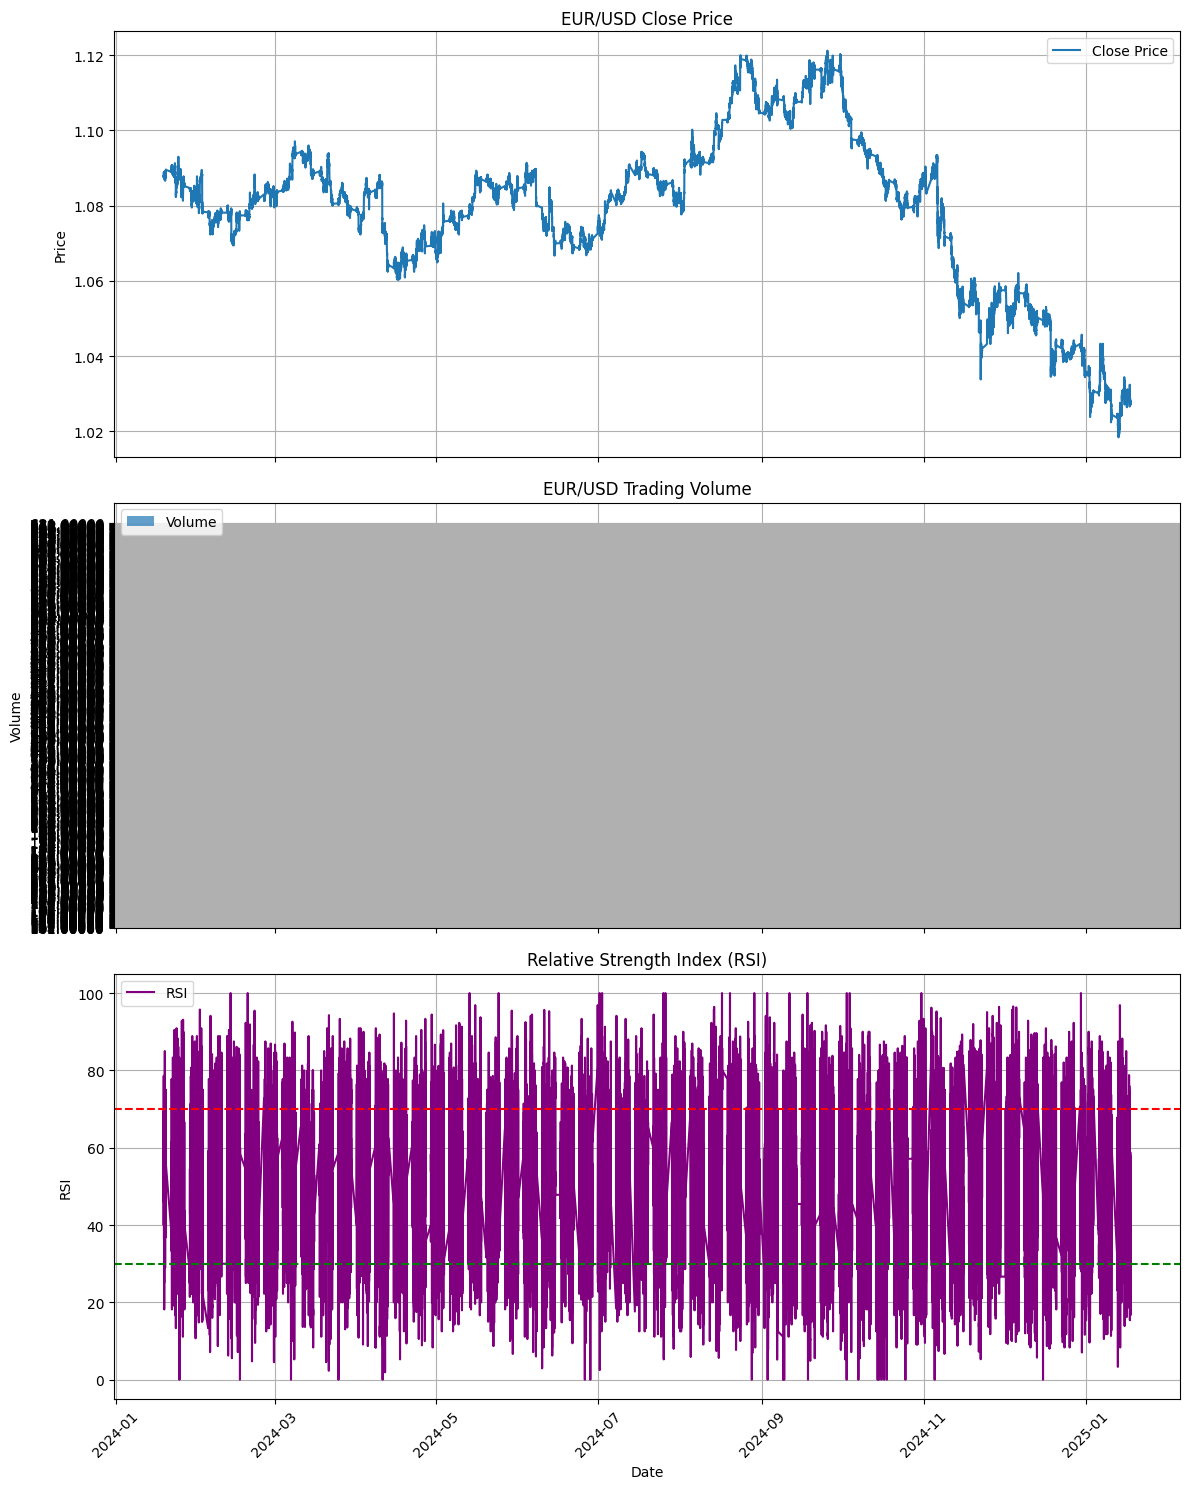

                       Open    High     Low   Close     Volume  RSI
Date                                                               
2024-01-19 00:00:00  1.0878  1.0880  1.0876  1.0877  141.00000  NaN
2024-01-19 00:05:00  1.0877  1.0880  1.0877  1.0878   91.00000  NaN
2024-01-19 00:10:00  1.0878  1.0879  1.0876  1.0877  121.00000  NaN
2024-01-19 00:15:00  1.0877  1.0880  1.0877  1.0880  101.00000  NaN
2024-01-19 00:20:00  1.0879  1.0881  1.0878  1.0880  115.00000  NaN

Data for a specific date:
Open         1.0877
High          1.088
Low          1.0877
Close         1.088
Volume    101.00000
RSI             NaN
Name: 2024-01-19 00:15:00, dtype: object

Data for a date range:
                       Open    High     Low   Close     Volume  RSI
Date                                                               
2024-01-19 00:10:00  1.0878  1.0879  1.0876  1.0877  121.00000  NaN
2024-01-19 00:15:00  1.0877  1.0880  1.0877  1.0880  101.00000  NaN
2024-01-19 00:20:00  1.0879  1.0881  1.0

<ipython-input-7-46018a2aaa61>:77: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.resample('H').agg({'Open': 'first',


In [ ]:
#Combined

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('EUROUSDRAW.csv', parse_dates=['Date'], dayfirst=True)
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close'])

# Set the Date column as the index before resampling
df.set_index('Date', inplace=True)
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot the Close price
ax1.plot(df.index, df['Close'], label='Close Price')
ax1.set_ylabel('Price')
ax1.set_title('EUR/USD Close Price')
ax1.legend()
ax1.grid(True)

# Plot the Volume
ax2.bar(df.index, df['Volume'], label='Volume', alpha=0.7)
ax2.set_ylabel('Volume')
ax2.set_title('EUR/USD Trading Volume')
ax2.legend()
ax2.grid(True)

# Plot the RSI
ax3.plot(df.index, df['RSI'], label='RSI', color='purple')
ax3.axhline(y=70, color='red', linestyle='--')
ax3.axhline(y=30, color='green', linestyle='--')
ax3.set_ylabel('RSI')
ax3.set_title('Relative Strength Index (RSI)')
ax3.legend()
ax3.grid(True)

# Set x-axis label
ax3.set_xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Print the first few rows of the dataframe including RSI
print(df.head())

# Check if the date exists in the index before accessing it
date_to_check = '2024-01-19 00:15'
if pd.Timestamp(date_to_check) in df.index:
    print("\nData for a specific date:")
    print(df.loc[date_to_check])
else:
    print(f"\nDate {date_to_check} not found in the DataFrame index.")

# Accessing data for a date range (make sure the range is present in the index)
date_range_start = '2024-01-19 00:10'
date_range_end = '2024-01-19 00:20'
print("\nData for a date range:")
print(df.loc[date_range_start:date_range_end])

# Accessing volume data for a date range
print("\nVolume data for a date range:")
print(df.loc[date_range_start:date_range_end, 'Volume'])

# Resampling to hourly data
hourly_data = df.resample('H').agg({'Open': 'first',
                                    'High': 'max',
                                    'Low': 'min',
                                    'Close': 'last',
                                    'Volume': 'sum'})
print("\nHourly resampled data:")
print(hourly_data.head())

# Calculating moving averages
#df['MA_5'] = df['Close'].rolling(window=5).mean()
#df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()

print("\nDataFrame with Moving Averages:")
print(df.tail())

Total Return: 3.74%
Number of Trades: 616
Sharpe Ratio: 1.19
Maximum Drawdown: -2.14%

Trade Details:
             Entry Date           Exit Date       ROI
0   2024-01-19 12:10:00 2024-01-19 12:15:00  0.000643
1   2024-01-22 13:00:00 2024-01-22 13:05:00  0.000367
2   2024-01-23 03:00:00 2024-01-23 03:05:00  0.000643
3   2024-01-23 07:30:00 2024-01-23 07:35:00  0.000183
4   2024-01-23 20:45:00 2024-01-23 20:50:00  0.000000
..                  ...                 ...       ...
611 2025-01-13 23:50:00 2025-01-13 23:55:00  0.000779
612 2025-01-14 16:45:00 2025-01-14 16:50:00  0.000194
613 2025-01-14 19:45:00 2025-01-14 19:50:00  0.000000
614 2025-01-15 08:40:00 2025-01-15 08:45:00  0.000388
615 2025-01-16 08:10:00 2025-01-16 08:15:00  0.000486

[616 rows x 3 columns]


<ipython-input-1-1c6547ddc446>:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


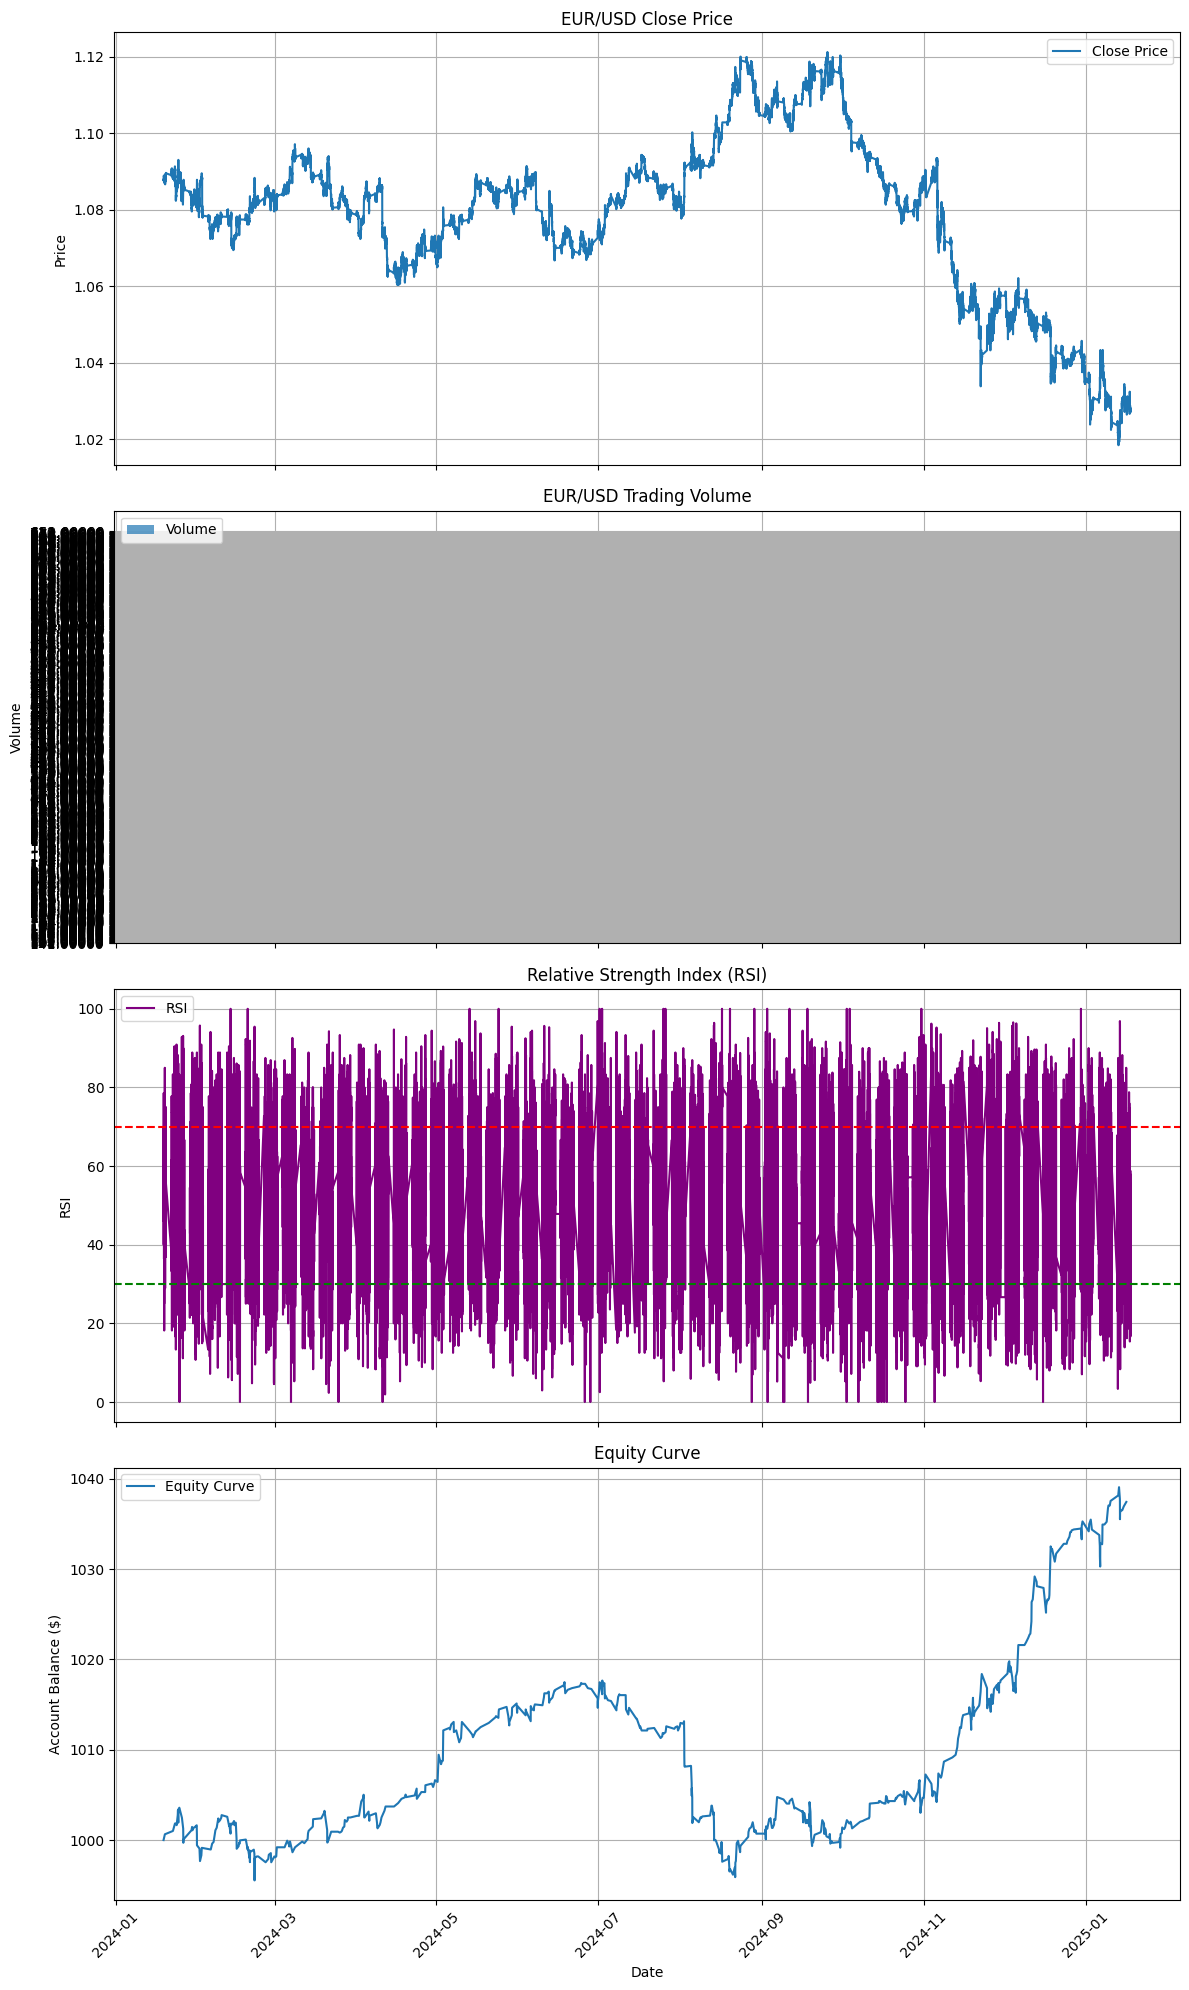

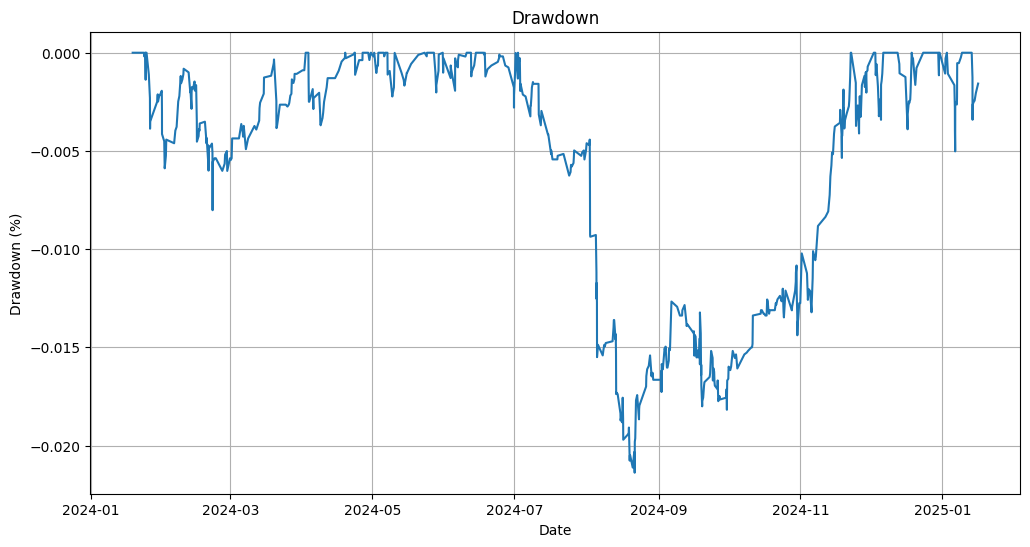

                       Open    High     Low   Close     Volume  RSI
Date                                                               
2024-01-19 00:00:00  1.0878  1.0880  1.0876  1.0877  141.00000  NaN
2024-01-19 00:05:00  1.0877  1.0880  1.0877  1.0878   91.00000  NaN
2024-01-19 00:10:00  1.0878  1.0879  1.0876  1.0877  121.00000  NaN
2024-01-19 00:15:00  1.0877  1.0880  1.0877  1.0880  101.00000  NaN
2024-01-19 00:20:00  1.0879  1.0881  1.0878  1.0880  115.00000  NaN

Hourly resampled data:
                       Open    High     Low   Close  \
Date                                                  
2024-01-19 00:00:00  1.0878  1.0881  1.0876  1.0878   
2024-01-19 01:00:00  1.0880  1.0887  1.0874  1.0884   
2024-01-19 02:00:00  1.0885  1.0889  1.0881  1.0887   
2024-01-19 03:00:00  1.0887  1.0889  1.0884  1.0887   
2024-01-19 04:00:00  1.0887  1.0889  1.0884  1.0885   

                                                                Volume  
Date                                     

<ipython-input-1-1c6547ddc446>:134: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.resample('H').agg({'Open': 'first',


In [ ]:
#Strategy Without Leverage and Trend-Following Integration:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('EUROUSDRAW.csv', parse_dates=['Date'], dayfirst=True)

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Define the trading strategy
def run_strategy(df, initial_balance, rsi_entry, rsi_exit, take_profit, stop_loss):
    position = 0
    entry_price = 0
    trades = []
    returns = []
    balance = initial_balance
    equity_curve = [initial_balance]

    for i in range(1, len(df)):
        if position == 0:  # No position
            if df['RSI'].iloc[i-1] >= rsi_entry:
                position = -1  # Short
                entry_price = df['Close'].iloc[i]
        elif position == -1:  # Short position
            roi = (entry_price - df['Close'].iloc[i]) / entry_price
            if roi >= take_profit or df['RSI'].iloc[i] <= rsi_exit or roi <= -stop_loss:
                returns.append(roi)
                trades.append((df.index[i-1], df.index[i], roi))
                position = 0
                balance *= (1 + roi)
                equity_curve.append(balance)

    equity_series = pd.Series(equity_curve, index=[df.index[0]] + [trade[1] for trade in trades])

    return trades, returns, equity_series

# Strategy parameters
initial_balance = 1000
rsi_entry = 80
rsi_exit = 50
take_profit = 0.0025  # 0.25%
stop_loss = 0.001    # 0.05%

# Run the strategy
trades, returns, equity_curve = run_strategy(df, initial_balance, rsi_entry, rsi_exit, take_profit, stop_loss)

# Calculate strategy performance
total_return = (equity_curve.iloc[-1] / initial_balance) - 1
sharpe_ratio = np.sqrt(252) * np.mean(returns) / np.std(returns) if len(returns) > 0 else 0

# Calculate maximum drawdown
running_max = equity_curve.cummax()
drawdown = (equity_curve - running_max) / running_max
max_drawdown = drawdown.min()

# Print results
print(f"Total Return: {total_return:.2%}")
print(f"Number of Trades: {len(trades)}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# Create a DataFrame with trade details
trades_df = pd.DataFrame(trades, columns=['Entry Date', 'Exit Date', 'ROI'])
print("\nTrade Details:")
print(trades_df)

# Create a figure with four subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 20), sharex=True)

# Plot the Close price
ax1.plot(df.index, df['Close'], label='Close Price')
ax1.set_ylabel('Price')
ax1.set_title('EUR/USD Close Price')
ax1.legend()
ax1.grid(True)

# Plot the Volume
ax2.bar(df.index, df['Volume'], label='Volume', alpha=0.7)
ax2.set_ylabel('Volume')
ax2.set_title('EUR/USD Trading Volume')
ax2.legend()
ax2.grid(True)

# Plot the RSI
ax3.plot(df.index, df['RSI'], label='RSI', color='purple')
ax3.axhline(y=70, color='red', linestyle='--')
ax3.axhline(y=30, color='green', linestyle='--')
ax3.set_ylabel('RSI')
ax3.set_title('Relative Strength Index (RSI)')
ax3.legend()
ax3.grid(True)

# Plot the Equity Curve
ax4.plot(equity_curve.index, equity_curve, label='Equity Curve')
ax4.set_ylabel('Account Balance ($)')
ax4.set_title('Equity Curve')
ax4.legend()
ax4.grid(True)

# Set x-axis label
ax4.set_xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Plot the drawdown
plt.figure(figsize=(12, 6))
plt.plot(drawdown.index, drawdown)
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.grid(True)
plt.show()

# Print the first few rows of the dataframe including RSI
print(df.head())

# Resampling to hourly data
hourly_data = df.resample('H').agg({'Open': 'first',
                                    'High': 'max',
                                    'Low': 'min',
                                    'Close': 'last',
                                    'Volume': 'sum'})
print("\nHourly resampled data:")
print(hourly_data.head())

print("\nDataFrame with Moving Averages:")
print(df.tail())


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


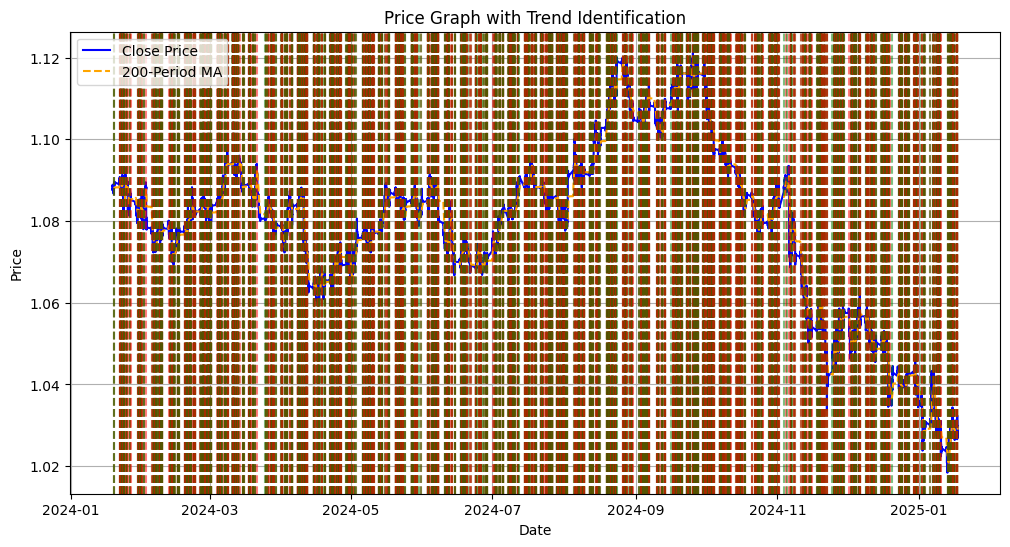

The current market trend is: Bearish


In [ ]:
#Trend-Following Integration Rational

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_price_and_trend(file_name):
    try:
        # Check if file exists
        if not os.path.exists(file_name):
            raise FileNotFoundError(f"The file '{file_name}' does not exist.")

        # Read the CSV file
        df = pd.read_csv(file_name, parse_dates=['Date'], dayfirst=True)
        df.set_index('Date', inplace=True)

        # Calculate a 200-period moving average for trend identification
        df['MA_200'] = df['Close'].rolling(window=200).mean()

        # Determine the trend (Bullish or Bearish)
        df['Trend'] = np.where(df['Close'] > df['MA_200'], 'Bullish', 'Bearish')

        # Plot the price graph
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['Close'], label='Close Price', color='blue')
        plt.plot(df.index, df['MA_200'], label='200-Period MA', color='orange', linestyle='--')

        # Highlight bullish and bearish trends
        for i in range(1, len(df)):
            if df['Trend'].iloc[i] != df['Trend'].iloc[i-1]:
                plt.axvline(x=df.index[i], color='green' if df['Trend'].iloc[i] == 'Bullish' else 'red', linestyle='--', alpha=0.5)

        plt.title('Price Graph with Trend Identification')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Return the last trend
        return df['Trend'].iloc[-1]

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return None

# Example usage
file_name = 'EUROUSDRAW.csv'  # Ensure this file exists in the current directory
current_trend = plot_price_and_trend(file_name)

if current_trend:
    print(f"The current market trend is: {current_trend}")
else:
    print("Unable to determine the current market trend due to an error.")


Enter the period for Moving Average A: 20
Enter the period for Moving Average B: 200
Total Return: 5.58%
Number of Trades: 725
Long Trades: 430
Short Trades: 295
Sharpe Ratio: 1.82
Maximum Drawdown: -0.85%


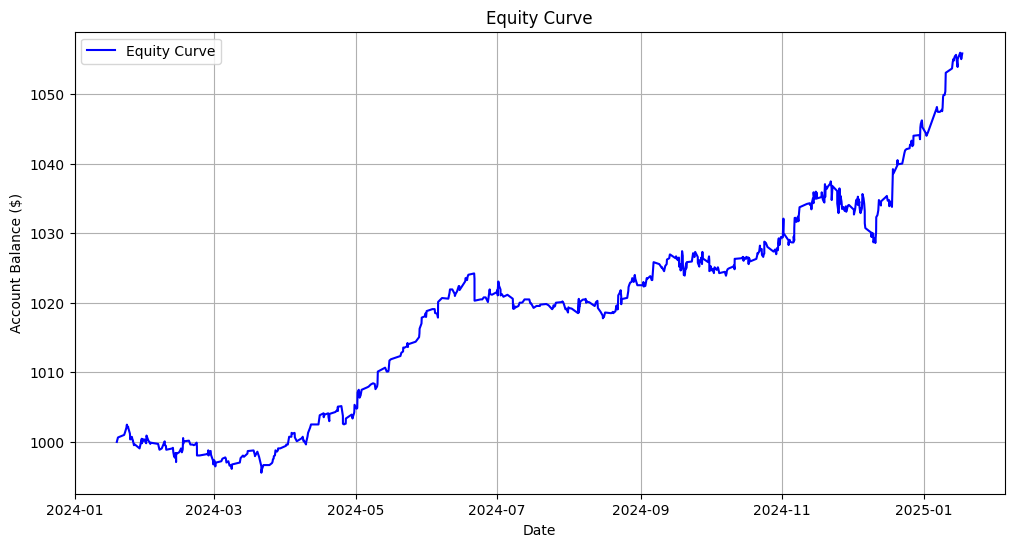

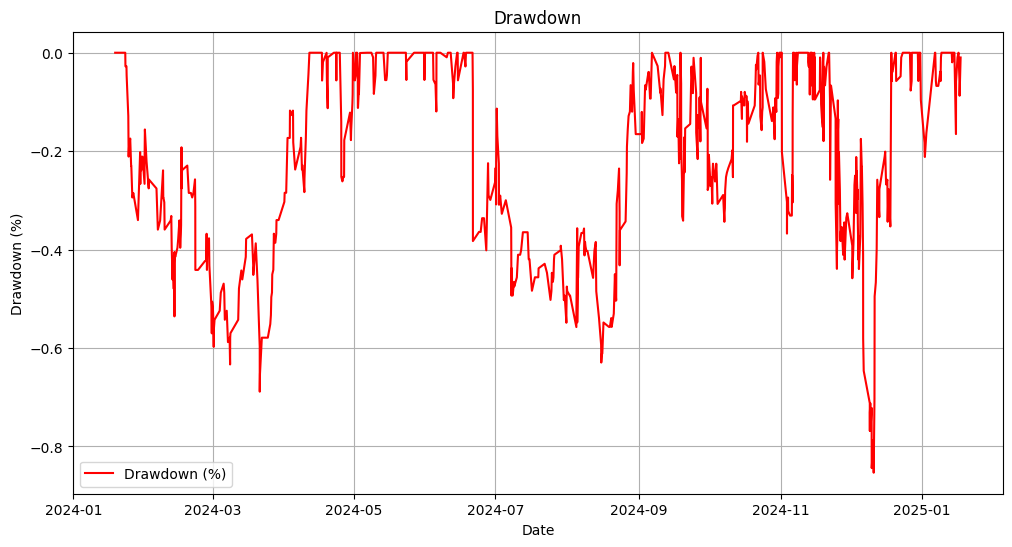

In [ ]:
## Strategy With Trend-Following Integration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to calculate trend based on two moving averages
def calculate_trend(df, ma_a, ma_b):
    df[f'MA_{ma_a}'] = df['Close'].rolling(window=ma_a).mean()
    df[f'MA_{ma_b}'] = df['Close'].rolling(window=ma_b).mean()
    df['Trend'] = np.where(df[f'MA_{ma_a}'] > df[f'MA_{ma_b}'], 'Bullish', 'Bearish')
    return df

# Function to run the trading strategy
def run_strategy(df, initial_balance, rsi_entry_long, rsi_exit_long, rsi_entry_short, rsi_exit_short, take_profit, stop_loss):
    position = 0
    entry_price = 0
    trades = []
    returns = []
    balance = initial_balance
    equity_curve = [initial_balance]
    long_trades = 0
    short_trades = 0

    for i in range(1, len(df)):
        if position == 0:  # No position
            if df['Trend'].iloc[i] == 'Bullish' and df['RSI'].iloc[i-1] <= rsi_entry_long:
                position = 1  # Long
                entry_price = df['Close'].iloc[i]
                long_trades += 1
            elif df['Trend'].iloc[i] == 'Bearish' and df['RSI'].iloc[i-1] >= rsi_entry_short:
                position = -1  # Short
                entry_price = df['Close'].iloc[i]
                short_trades += 1
        elif position == 1:  # Long position
            roi = (df['Close'].iloc[i] - entry_price) / entry_price
            if roi >= take_profit or df['RSI'].iloc[i] >= rsi_exit_long or roi <= -stop_loss:
                returns.append(roi)
                trades.append((df.index[i-1], df.index[i], roi))
                position = 0
                balance *= (1 + roi)
                equity_curve.append(balance)
        elif position == -1:  # Short position
            roi = (entry_price - df['Close'].iloc[i]) / entry_price
            if roi >= take_profit or df['RSI'].iloc[i] <= rsi_exit_short or roi <= -stop_loss:
                returns.append(roi)
                trades.append((df.index[i-1], df.index[i], roi))
                position = 0
                balance *= (1 + roi)
                equity_curve.append(balance)

    equity_series = pd.Series(equity_curve, index=[df.index[0]] + [trade[1] for trade in trades])
    return trades, returns, equity_series, long_trades, short_trades

# Analyze forex data and plot results
def analyze_forex_data(file_path):
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"The file '{file_path}' does not exist.")

        # Load data and set up DataFrame
        df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)
        df.set_index('Date', inplace=True)

        # User-defined moving averages for trend calculation
        ma_a = int(input("Enter the period for Moving Average A: "))
        ma_b = int(input("Enter the period for Moving Average B: "))
        df = calculate_trend(df, ma_a, ma_b)

        # Calculate RSI
        df['RSI'] = calculate_rsi(df['Close'])

        # Get user-defined RSI parameters for long and short trades
        rsi_entry_long = 25
        rsi_exit_long =  40
        rsi_entry_short =  80
        rsi_exit_short =  50

        # Strategy parameters
        initial_balance = 1000.0
        take_profit = 0.0025
        stop_loss = 0.0005
        # Run the strategy
        trades, returns, equity_curve, long_trades, short_trades = run_strategy(
            df, initial_balance, rsi_entry_long, rsi_exit_long,
            rsi_entry_short, rsi_exit_short, take_profit, stop_loss)

        # Calculate performance metrics and drawdown
        total_return = (equity_curve.iloc[-1] / initial_balance) - 1
        sharpe_ratio = np.sqrt(252) * np.mean(returns) / np.std(returns) if len(returns) > 0 else 0

        running_max = equity_curve.cummax()
        drawdown = (equity_curve - running_max) / running_max
        max_drawdown = drawdown.min()

        print(f"Total Return: {total_return:.2%}")
        print(f"Number of Trades: {len(trades)}")
        print(f"Long Trades: {long_trades}")
        print(f"Short Trades: {short_trades}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Maximum Drawdown: {max_drawdown:.2%}")

        # Plotting the equity curve
        plt.figure(figsize=(12, 6))
        plt.plot(equity_curve.index, equity_curve, label='Equity Curve', color='blue')
        plt.title('Equity Curve')
        plt.xlabel('Date')
        plt.ylabel('Account Balance ($)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plotting the drawdown curve
        plt.figure(figsize=(12, 6))
        plt.plot(drawdown.index, drawdown * 100, label='Drawdown (%)', color='red')
        plt.title('Drawdown')
        plt.xlabel('Date')
        plt.ylabel('Drawdown (%)')
        plt.legend()
        plt.grid(True)
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    file_path = 'EUROUSDRAW.csv'  # Ensure this file exists in the current directory or provide a full path.
    analyze_forex_data(file_path)


Enter the period for Moving Average A: 50
Enter the period for Moving Average B: 200
Analysis starts from: 2024-03-19 00:00:00
Total Return: 10795.54%
Number of Trades: 694
Long Trades: 412
Short Trades: 282
Sharpe Ratio: 2.05
Maximum Drawdown: -70.52%
Date of Maximum Drawdown: 2024-12-11 07:35:00
Max High of Equity: 12167.699792680176
Max Low of Equity: 62.01208050276825


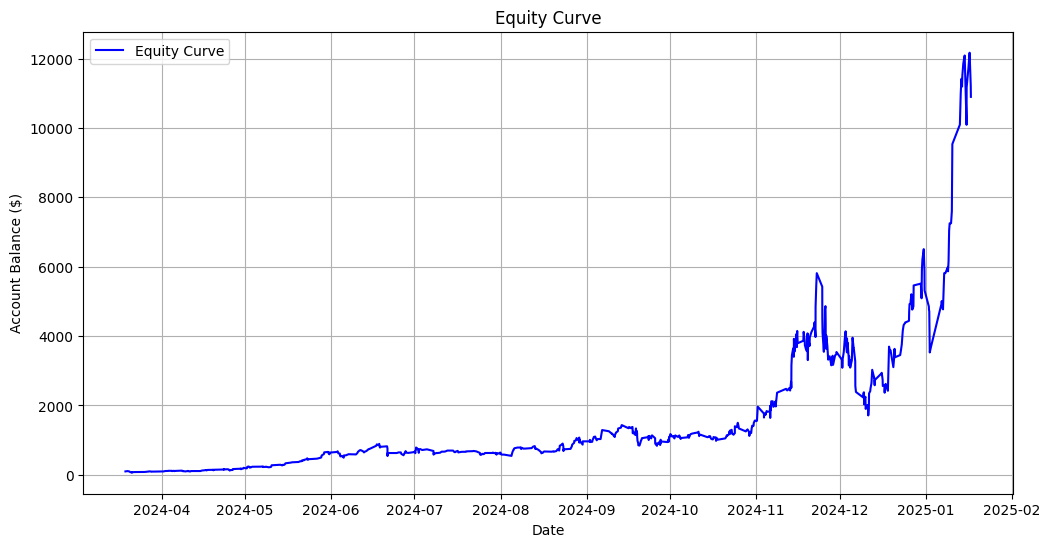

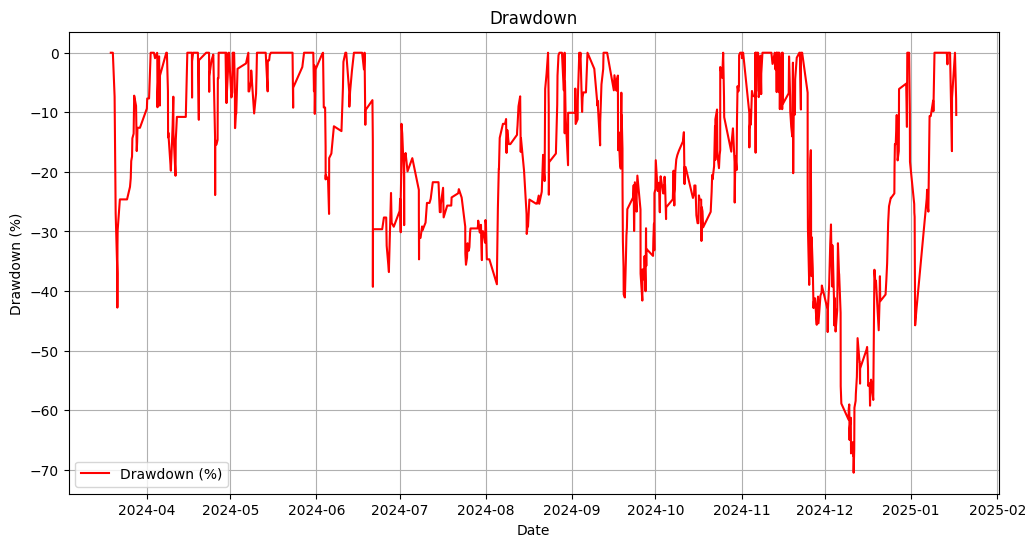

In [ ]:
#Final Strategy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

#Function to calculate trend based on two moving averages
def calculate_trend(df, ma_a, ma_b):
    df[f'MA_{ma_a}'] = df['Close'].rolling(window=ma_a).mean()
    df[f'MA_{ma_b}'] = df['Close'].rolling(window=ma_b).mean()
    df['Trend'] = np.where(df[f'MA_{ma_a}'] > df[f'MA_{ma_b}'], 'Bullish', 'Bearish')
    return df
# def calculate_trend(df, ema_a, ema_b):
#     df[f'EMA_{ema_a}'] = df['Close'].ewm(span=ema_a, adjust=False).mean()
#     df[f'EMA_{ema_b}'] = df['Close'].ewm(span=ema_b, adjust=False).mean()
#     df['Trend'] = np.where(df[f'EMA_{ema_a}'] > df[f'EMA_{ema_b}'], 'Bullish', 'Bearish')
#     return df

def run_strategy(df, initial_balance, rsi_entry_long, rsi_exit_long, rsi_entry_short, rsi_exit_short, take_profit, stop_loss):
    position = 0
    entry_price = 0
    trades = []
    returns = []
    balance = initial_balance
    equity_curve = [initial_balance]
    long_trades = 0
    short_trades = 0
    leverage = 100  # 100X leverage

    for i in range(1, len(df)):
        if position == 0:  # No position
            if df['Trend'].iloc[i] == 'Bullish' and df['RSI'].iloc[i-1] <= rsi_entry_long:
                position = 1  # Long
                entry_price = df['Close'].iloc[i]
                long_trades += 1
            elif df['Trend'].iloc[i] == 'Bearish' and df['RSI'].iloc[i-1] >= rsi_entry_short:
                position = -1  # Short
                entry_price = df['Close'].iloc[i]
                short_trades += 1
        elif position == 1:  # Long position
            roi = (df['Close'].iloc[i] - entry_price) / entry_price
            if roi >= take_profit or df['RSI'].iloc[i] >= rsi_exit_long or roi <= -stop_loss:
                returns.append(roi * leverage)
                trades.append((df.index[i-1], df.index[i], roi * leverage))
                position = 0
                balance *= (1 + roi * leverage)
                equity_curve.append(balance)
        elif position == -1:  # Short position
            roi = (entry_price - df['Close'].iloc[i]) / entry_price
            if roi >= take_profit or df['RSI'].iloc[i] <= rsi_exit_short or roi <= -stop_loss:
                returns.append(roi * leverage)
                trades.append((df.index[i-1], df.index[i], roi * leverage))
                position = 0
                balance *= (1 + roi * leverage)
                equity_curve.append(balance)

    equity_series = pd.Series(equity_curve, index=[df.index[0]] + [trade[1] for trade in trades])
    return trades, returns, equity_series, long_trades, short_trades

def analyze_forex_data(file_path):
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"The file '{file_path}' does not exist.")

        # Load data and set up DataFrame
        df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)
        df.set_index('Date', inplace=True)

        # Skip the first 2 months of data
        start_date = df.index.min() + pd.DateOffset(months=2)
        df = df[df.index >= start_date]

        # User-defined moving averages for trend calculation
        ma_a = int(input("Enter the period for Moving Average A: "))
        ma_b = int(input("Enter the period for Moving Average B: "))
        df = calculate_trend(df, ma_a, ma_b)

        # Calculate RSI
        df['RSI'] = calculate_rsi(df['Close'])
         # Get user-defined RSI parameters for long and short trades
        rsi_entry_long = 25
        rsi_exit_long =  40
        rsi_entry_short =  80
        rsi_exit_short =  50


        # Strategy parameters
        initial_balance = 100
        take_profit = 0.0025
        stop_loss = 0.0006

        # Run the strategy
        trades, returns, equity_curve, long_trades, short_trades = run_strategy(
            df, initial_balance, rsi_entry_long, rsi_exit_long,
            rsi_entry_short, rsi_exit_short, take_profit, stop_loss)

        # Calculate performance metrics and drawdown
        total_return = (equity_curve.iloc[-1] / initial_balance) - 1
        sharpe_ratio = np.sqrt(252) * np.mean(returns) / np.std(returns) if len(returns) > 0 else 0

        running_max = equity_curve.cummax()
        drawdown = (equity_curve - running_max) / running_max
        max_drawdown = drawdown.min()
        max_drawdown_date = drawdown.idxmin()

        print(f"Analysis starts from: {start_date}")
        print(f"Total Return: {total_return:.2%}")
        print(f"Number of Trades: {len(trades)}")
        print(f"Long Trades: {long_trades}")
        print(f"Short Trades: {short_trades}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Maximum Drawdown: {max_drawdown:.2%}")
        print(f"Date of Maximum Drawdown: {max_drawdown_date}")
        max_high = equity_curve.max()
        max_low = equity_curve.min()

        print(f"Max High of Equity: {max_high}")
        print(f"Max Low of Equity: {max_low}")


        # Plotting the equity curve
        plt.figure(figsize=(12, 6))
        plt.plot(equity_curve.index, equity_curve, label='Equity Curve', color='blue')
        plt.title('Equity Curve')
        plt.xlabel('Date')
        plt.ylabel('Account Balance ($)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plotting the drawdown curve
        plt.figure(figsize=(12, 6))
        plt.plot(drawdown.index, drawdown * 100, label='Drawdown (%)', color='red')
        plt.title('Drawdown')
        plt.xlabel('Date')
        plt.ylabel('Drawdown (%)')
        plt.legend()
        plt.grid(True)
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
if __name__ == "__main__":
    file_path = 'EUROUSDRAW.csv'  # Ensure this file exists in the current directory or provide a full path.
    analyze_forex_data(file_path)


